<h1> Data Analysis of Utah Jazz vs Golden State Warriors </h1>

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
player_trad= pd.read_csv('player_traditional_stats.csv')
player_adv=pd.read_csv('player_advanced_stats.csv')
team_trad=pd.read_csv('team_traditional_stats.csv')
team_adv=pd.read_csv('team_advanced_stats.csv')

In [118]:
player=pd.merge(player_trad, player_adv, on=['nameI', 'teamName'], how='left', suffixes=('_trad', '_adv'))

In [119]:
team=pd.merge(team_trad, team_adv, on=['teamName'], how='inner', suffixes=('_trad', '_adv'))

In [120]:
team['group']= ['gsw_starters', 'gsw_bench', 'uj_starters', 'uj_bench']

In [121]:
team['group']

0    gsw_starters
1       gsw_bench
2     uj_starters
3        uj_bench
Name: group, dtype: object

In [122]:
team= team.drop('startersBench', axis=1)

In [123]:
player = player.loc[:, ~player.T.duplicated()]

In [124]:
cols_drop=['gameId_trad', 'teamId_trad', 'teamCity_trad', 'teamName', 'teamSlug_trad', 'personId_trad', 'firstName_trad',
       'familyName_trad','comment_trad','jerseyNum_trad','playerSlug_trad']
player=player.drop(cols_drop, axis=1)

In [125]:
player=player.rename(columns={'teamTricode_trad':'teamname', 'nameI':'playername', 'minutes_trad':'minutes'})
player=player.rename(columns=str.lower)

In [126]:
team=team.rename(columns=str.lower)

In [127]:
player['minutes'].str.contains("NaN")
player=player[player['minutes'].notna()].reset_index(drop=True)

In [128]:
team.columns

Index(['gameid_trad', 'teamid_trad', 'teamcity_trad', 'teamname',
       'teamtricode_trad', 'teamslug_trad', 'minutes_trad', 'fieldgoalsmade',
       'fieldgoalsattempted', 'fieldgoalspercentage', 'threepointersmade',
       'threepointersattempted', 'threepointerspercentage', 'freethrowsmade',
       'freethrowsattempted', 'freethrowspercentage', 'reboundsoffensive',
       'reboundsdefensive', 'reboundstotal', 'assists', 'steals', 'blocks',
       'turnovers', 'foulspersonal', 'points', 'gameid_adv', 'teamid_adv',
       'teamcity_adv', 'teamtricode_adv', 'teamslug_adv', 'minutes_adv',
       'estimatedoffensiverating', 'offensiverating',
       'estimateddefensiverating', 'defensiverating', 'estimatednetrating',
       'netrating', 'assistpercentage', 'assisttoturnover', 'assistratio',
       'offensivereboundpercentage', 'defensivereboundpercentage',
       'reboundpercentage', 'estimatedteamturnoverpercentage', 'turnoverratio',
       'effectivefieldgoalpercentage', 'trueshooting

In [129]:
player.columns

Index(['teamname', 'playername', 'position_trad', 'minutes', 'fieldgoalsmade',
       'fieldgoalsattempted', 'fieldgoalspercentage', 'threepointersmade',
       'threepointersattempted', 'threepointerspercentage', 'freethrowsmade',
       'freethrowsattempted', 'freethrowspercentage', 'reboundsoffensive',
       'reboundsdefensive', 'reboundstotal', 'assists', 'steals', 'blocks',
       'turnovers', 'foulspersonal', 'points', 'plusminuspoints',
       'estimatedoffensiverating', 'estimateddefensiverating',
       'estimatednetrating', 'assistpercentage', 'assisttoturnover',
       'assistratio', 'offensivereboundpercentage',
       'defensivereboundpercentage', 'reboundpercentage', 'turnoverratio',
       'effectivefieldgoalpercentage', 'trueshootingpercentage',
       'usagepercentage', 'estimatedpace', 'paceper40', 'possessions', 'pie'],
      dtype='object')

In [130]:
#teamstatsheet
team_total=(team.groupby(['teamname'], as_index=False)).sum(numeric_only=True)
print(team_total[['teamname','points','fieldgoalsmade','fieldgoalsattempted','threepointersmade','threepointersattempted','freethrowsmade','freethrowsattempted','assists','reboundstotal','turnovers']])


   teamname  points  fieldgoalsmade  fieldgoalsattempted  threepointersmade  \
0      Jazz     114              45                   86                 13   
1  Warriors     123              43                   87                 19   

   threepointersattempted  freethrowsmade  freethrowsattempted  assists  \
0                      35              11                   17       32   
1                      45              18                   24       32   

   reboundstotal  turnovers  
0             37         15  
1             45         14  


In [131]:
#top scorers of each team
top_scorers=player.loc[player.groupby('teamname')['points'].idxmax()]
print(top_scorers[['teamname','playername','points','fieldgoalsmade','fieldgoalsattempted','threepointersmade','threepointersattempted','freethrowsmade','assists','reboundstotal','turnovers','plusminuspoints','trueshootingpercentage']])

   teamname    playername  points  fieldgoalsmade  fieldgoalsattempted  \
4       GSW      S. Curry      31               8                   18   
12      UTA  L. Markkanen      35              15                   27   

    threepointersmade  threepointersattempted  freethrowsmade  assists  \
4                   6                      12               9        5   
12                  2                       8               3        1   

    reboundstotal  turnovers  plusminuspoints  trueshootingpercentage  
4               2          2              5.0                   0.706  
12              6          1             -2.0                   0.608  


In [206]:
#top net rating player of each team
top_netrating=player.loc[player.groupby('teamname')['estimatednetrating'].idxmax()]
print(top_netrating[['teamname','playername','estimatednetrating']])

   teamname   playername  estimatednetrating
2       GSW      Q. Post                28.1
20      UTA  C. Williams                 5.8


In [207]:
#top offensive rating player of each team
top_rating_off=player.loc[player.groupby('teamname')['estimatedoffensiverating'].idxmax()]
print(top_rating_off[['teamname','playername','estimatedoffensiverating']])

   teamname playername  estimatedoffensiverating
3       GSW   M. Moody                     143.6
13      UTA    K. Love                     127.5


In [205]:
#top defensive rating player of each team
top_rating_def=player.loc[player.groupby('teamname')['estimateddefensiverating'].idxmax()]
print(top_rating_def[['teamname','playername','estimateddefensiverating']])

   teamname  playername  estimateddefensiverating
1       GSW    D. Green                     144.4
18      UTA  I. Collier                     141.3


In [204]:
#players who have scored 20+ points and 5+ assists or rebounds
player['HighPerformance']='No'

for i in range(len(player)):
    if(player.loc[i,'points'] >=20) and (player.loc[i, 'reboundstotal']>=5 or player.loc[i, 'assists'] >=5): 
        player.loc[i,'HighPerformance']='Yes'

top_perfromance=player[player['HighPerformance']=='Yes']
print(top_perfromance[['playername','teamname','points','reboundstotal','assists']])

      playername teamname  points  reboundstotal  assists
4       S. Curry      GSW      31              2        5
12  L. Markkanen      UTA      35              6        1
15     K. George      UTA      22              2        9


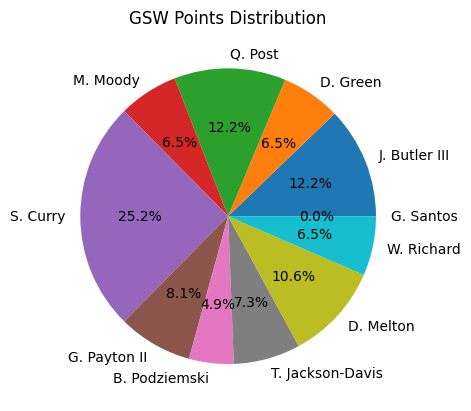

In [197]:
gsw_players=player[player['teamname']=='GSW']
plt.pie(gsw_players['points'], labels=gsw_players['playername'], autopct="%1.1f%%")
plt.title('GSW Points Distribution')
plt.show()

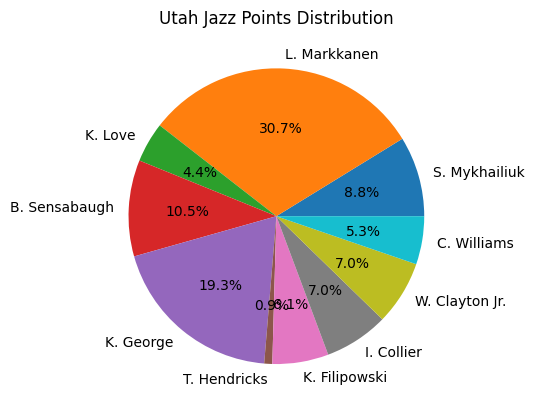

In [198]:
utah_players=player[player['teamname']=='UTA']
plt.pie(utah_players['points'], labels=utah_players['playername'], autopct="%1.1f%%")
plt.title('Utah Jazz Points Distribution')
plt.show()

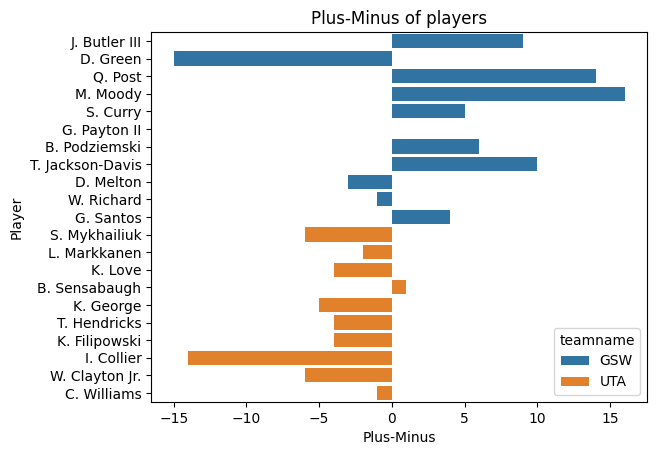

In [132]:
#plus-minus of each players of both team
sns.barplot(data=player, y='playername', x='plusminuspoints', hue='teamname')
plt.title('Plus-Minus of players')
plt.xlabel('Plus-Minus')
plt.ylabel('Player')
plt.show()

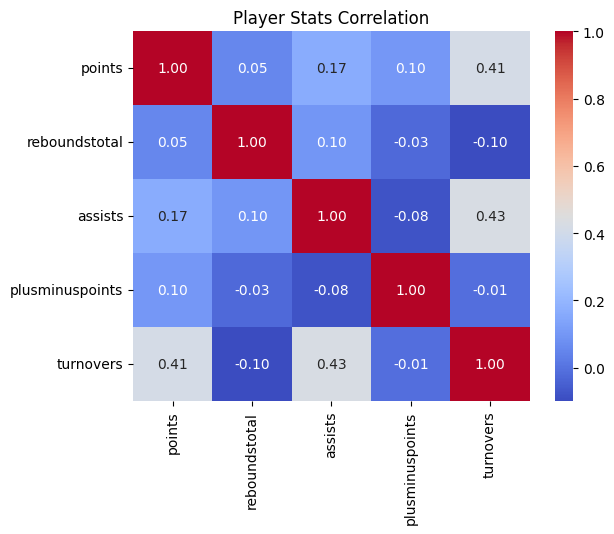

In [ ]:
#heatmap of players stat
stats=player[['points', 'reboundstotal', 'assists', 'plusminuspoints', 'turnovers']]
corr= stats.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Player Stats Correlation')
plt.show()

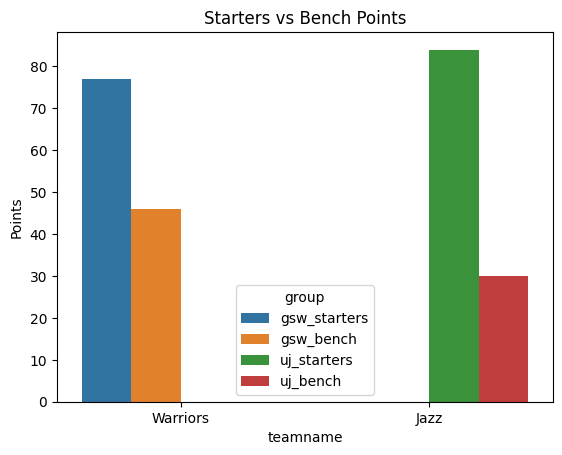

In [134]:
#starters vs bench points of each team
sns.barplot(data=team, x='teamname', y='points',hue='group')
plt.title('Starters vs Bench Points')
plt.ylabel('Points')
plt.show()

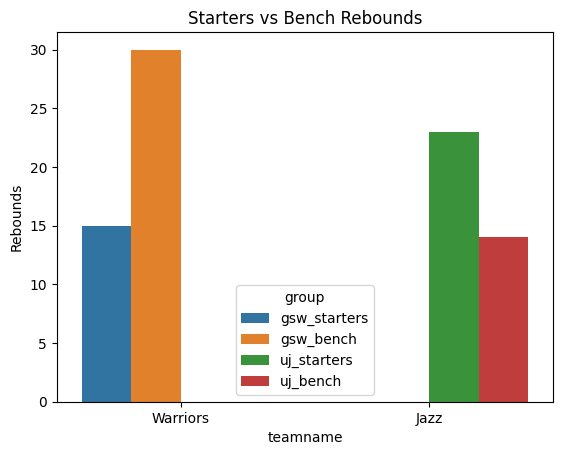

In [135]:
#starters vs bench rebounds of each team
sns.barplot(data=team, x='teamname', y='reboundstotal', hue='group')
plt.title('Starters vs Bench Rebounds')
plt.ylabel('Rebounds')
plt.show()

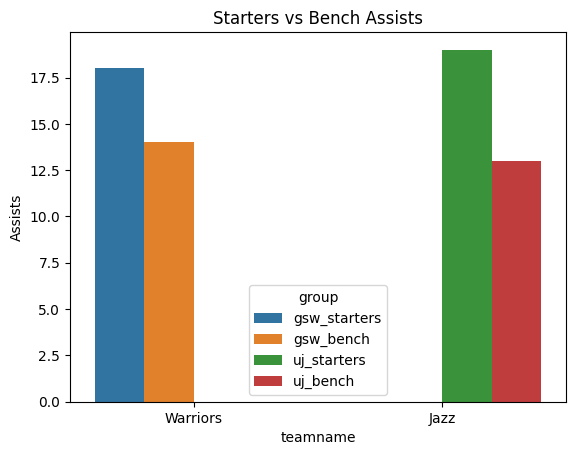

In [136]:
#starters vs bench rebounds of each team
sns.barplot(data=team, x='teamname', y='assists', hue='group')
plt.title('Starters vs Bench Assists')
plt.ylabel('Assists')
plt.show()

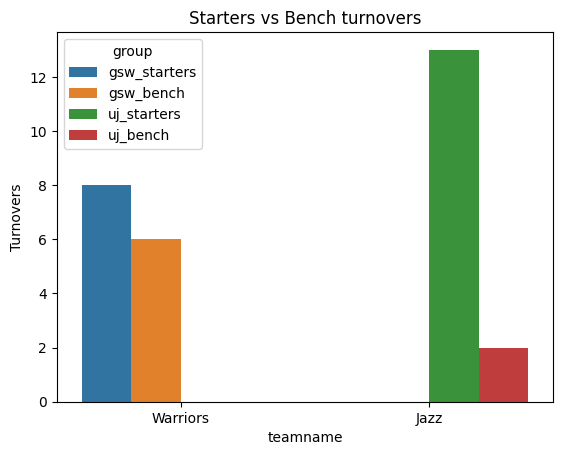

In [137]:
#starters vs bench points of each team
sns.barplot(data=team, x='teamname', y='turnovers', hue='group')
plt.title('Starters vs Bench turnovers')
plt.ylabel('Turnovers')
plt.show()

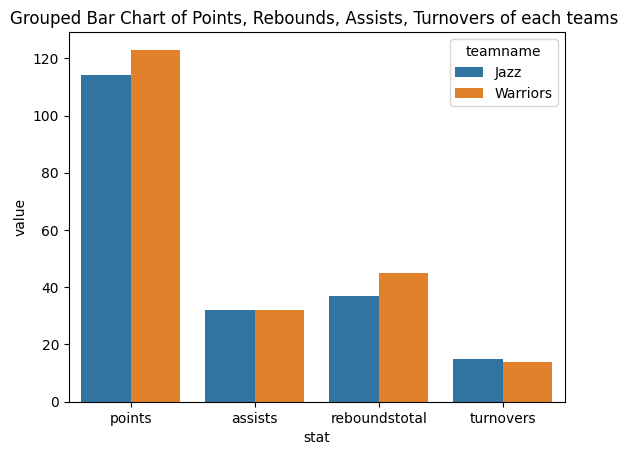

In [203]:
#Grouped Bar Chart of Points, Rebounds, Assists, Turnovers
stats=['points','assists','reboundstotal','turnovers']
team_stats_melted = team_total.melt(id_vars='teamname', value_vars=stats, var_name='stat', value_name='value')
sns.barplot(data=team_stats_melted, x='stat', y='value', hue='teamname')
plt.title('Grouped Bar Chart of Points, Rebounds, Assists, Turnovers of each teams ')
plt.show()


In [139]:
team_total['ftrate']=team_total['freethrowsmade'] / team_total['freethrowsattempted']
team_total['fgpercentage']=team_total['fieldgoalsmade'] / team_total['fieldgoalsattempted']
team_total['reboundpercentage']=team['reboundpercentage']
team_total['turnoverratio'] = team_total['turnoverratio']


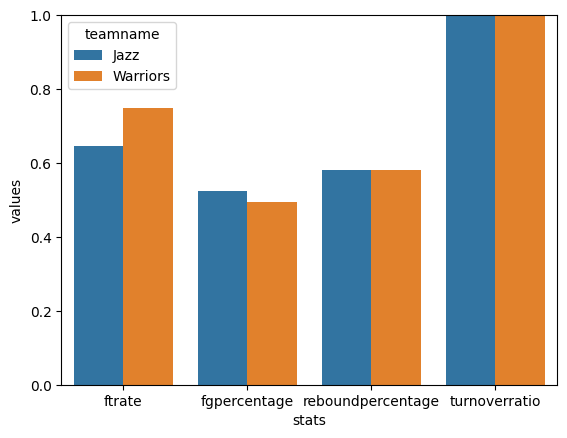

In [140]:
#Grouped Bar Chart of Points, Rebounds, Assists, Turnovers
factors=['ftrate','fgpercentage','reboundpercentage','turnoverratio']
team_stats_melted = team_total.melt(id_vars='teamname', value_vars=factors, var_name='stats', value_name='values')
sns.barplot(data=team_stats_melted, x='stats', y='values', hue='teamname')
plt.ylim(0,1)
plt.title('')
plt.show()
